<a href="https://colab.research.google.com/github/mdraavash/Data-Analytics/blob/main/ScreenTimeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Necessarcy Dependencies

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install kagglehub[pandas-datasets]

# Importing necessarcy Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Importing the dataset from kaggle hub

In [ ]:
# Set the path to the file you'd like to load
file_path = "screen_time.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ak0212/average-daily-screen-time-for-children",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

100%|██████████| 8.15k/8.15k [00:00<00:00, 11.0MB/s]


# Inspecting dataset

## Inspecting rows

In [ ]:
display(df.head(10))

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500
5,5,Male,Total,Weekend,1.93,500
6,5,Female,Educational,Weekday,0.49,500
7,5,Female,Recreational,Weekday,0.96,500
8,5,Female,Total,Weekday,1.45,500
9,5,Female,Educational,Weekend,0.50,500


## Inpsecting data types

In [ ]:
display(df.dtypes)

,0
Age,int64
Gender,object
Screen Time Type,object
Day Type,object
Average Screen Time (hours),float64
Sample Size,int64


## Inspecting missing values

In [ ]:
display(df.isnull().sum())
if df.isnull().values.any():
  print("There are missing values")
else:
  print("There are no missing values")


,0
Age,0
Gender,0
Screen Time Type,0
Day Type,0
Average Screen Time (hours),0
Sample Size,0


There are no missing values


## Inspecting unique values

In [ ]:
for cols in df.columns:
   print(f"Number of unique value present in {cols}: {df[cols].unique()} \n")

for cols in df.columns:
  print(f"Number of unique value present in {cols}: {df[cols].nunique()}")

Number of unique value present in Age: [ 5  6  7  8  9 10 11 12 13 14 15] 

Number of unique value present in Gender: ['Male' 'Female' 'Other/Prefer not to say'] 

Number of unique value present in Screen Time Type: ['Educational' 'Recreational' 'Total'] 

Number of unique value present in Day Type: ['Weekday' 'Weekend'] 

Number of unique value present in Average Screen Time (hours): [0.44 1.11 1.55 0.5  1.44 1.93 0.49 0.96 1.45 1.4  1.9  0.52 0.98 1.5
 1.51 1.95 0.64 1.39 2.02 0.74 1.75 2.49 0.57 1.37 0.83 1.63 2.46 0.59
 1.41 2.   0.58 1.91 0.8  2.55 1.08 2.14 3.22 0.81 1.61 2.42 0.66 2.53
 3.19 0.76 1.74 2.5  0.75 2.28 3.02 0.85 2.18 3.03 1.29 2.57 3.86 0.93
 2.95 1.   2.61 3.62 0.97 2.03 3.   0.91 2.98 3.89 0.73 2.9  3.63 3.52
 4.46 1.12 2.26 3.39 1.26 2.94 4.19 0.79 2.71 3.5  1.33 2.99 4.32 1.07
 2.97 4.05 3.55 5.29 0.94 2.93 3.87 1.09 4.72 3.04 4.   1.73 3.38 5.11
 3.21 4.55 1.48 4.4  5.89 1.53 2.86 4.39 4.11 5.44 4.5  1.86 3.75 5.61
 1.22 3.94 5.15 1.47 4.95 6.42 1.36 4.88 2.01

# Data Cleaning and Preprocessing

## Creating copy of original dataset

In [ ]:
df_original = df.copy()

## Select Numeric and Categorial columns


In [ ]:
numerical_columns = []
categorical_columns = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

print("Numerical features:", numerical_columns)
print("Categorical features:", categorical_columns)

Numerical features: ['Age', 'Average Screen Time (hours)', 'Sample Size']
Categorical features: ['Gender', 'Screen Time Type', 'Day Type']


## Handling Missing Features

In [ ]:
for cols in numerical_columns:
  df[cols].fillna(df[cols].mean(), inplace=True)

/tmp/ipython-input-631450501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].fillna(df[cols].mean(), inplace=True)


## Checking for missing value


In [ ]:
display(df.isnull().sum())

,0
Age,0
Gender,0
Screen Time Type,0
Day Type,0
Average Screen Time (hours),0
Sample Size,0


## Converting Categorial columns into numeric

In [ ]:
# using one hot coding for both gender and date type columns as they are not nominal data (i.e., they dont have any inherit order)
df = pd.get_dummies(df, columns=['Screen Time Type','Gender', 'Day Type'], drop_first=True)
#using get_dumies will remove the first attribute for each of the column
#if both columns are false then the first column will become true
display(df.head())

,Age,Average Screen Time (hours),Sample Size,Screen Time Type_Recreational,Screen Time Type_Total,Gender_Male,Gender_Other/Prefer not to say,Day Type_Weekend
0,5,0.44,500,False,False,True,False,False
1,5,1.11,500,True,False,True,False,False
2,5,1.55,500,False,True,True,False,False
3,5,0.50,500,False,False,True,False,True
4,5,1.44,500,True,False,True,False,True


# Standarized Numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features_to_standardize = ['Age', 'Average Screen Time (hours)', 'Sample Size']
df[numerical_features_to_standardize] = scaler.fit_transform(df[numerical_features_to_standardize])
display(df.head())

,Age,Average Screen Time (hours),Sample Size,Screen Time Type_Recreational,Screen Time Type_Total,Gender_Male,Gender_Other/Prefer not to say,Day Type_Weekend
0,-1.581139,-1.331118,1.581139,False,False,True,False,False
1,-1.581139,-0.981788,1.581139,True,False,True,False,False
2,-1.581139,-0.752378,1.581139,False,True,True,False,False
3,-1.581139,-1.299835,1.581139,False,False,True,False,True
4,-1.581139,-0.809730,1.581139,True,False,True,False,True


# Changes in dataset

## Dimensional changes

In [ ]:
print("\n2. DIMENSIONAL CHANGES:")
print(f"   Original shape: {df_original.shape}")
print(f"   Processed shape: {df.shape}")
print(f"   Columns added/removed: {df.shape[1] - df_original.shape[1]}")


2. DIMENSIONAL CHANGES:
   Original shape: (198, 6)
   Processed shape: (198, 8)
   Columns added/removed: 2


## Data Type Changes

In [ ]:
print("\n2. DATA TYPE CHANGES:")
print(f"Original data type: \n{df_original.dtypes}")
print(f"\nProcessed data type: \n{df.dtypes}")


2. DATA TYPE CHANGES:
Original data type: 
Age                              int64
Gender                          object
Screen Time Type                object
Day Type                        object
Average Screen Time (hours)    float64
Sample Size                      int64
dtype: object

Processed data type: 
Age                               float64
Average Screen Time (hours)       float64
Sample Size                       float64
Screen Time Type_Recreational        bool
Screen Time Type_Total               bool
Gender_Male                          bool
Gender_Other/Prefer not to say       bool
Day Type_Weekend                     bool
dtype: object


## Statistical changes

In [ ]:
print("\n2. STATSTICAL CHANGES:")
print(f"Original data frame: \n{df_original[numerical_columns].describe()}")
print(f"\nProcessed data frame: \n{df[numerical_columns].describe()}")


2. STATSTICAL CHANGES:
Original data frame: 
              Age  Average Screen Time (hours)  Sample Size
count  198.000000                   198.000000   198.000000
mean    10.000000                     2.993030   400.000000
std      3.170294                     1.922822    63.405872
min      5.000000                     0.440000   300.000000
25%      7.000000                     1.402500   340.000000
50%     10.000000                     2.490000   400.000000
75%     13.000000                     4.397500   460.000000
max     15.000000                     8.190000   500.000000

Processed data frame: 
              Age  Average Screen Time (hours)  Sample Size
count  198.000000                 1.980000e+02   198.000000
mean     0.000000                 4.306320e-16     0.000000
std      1.002535                 1.002535e+00     1.002535
min     -1.581139                -1.331118e+00    -1.581139
25%     -0.948683                -8.292824e-01    -0.948683
50%      0.000000             

## Visual Comparison

### HIstogram

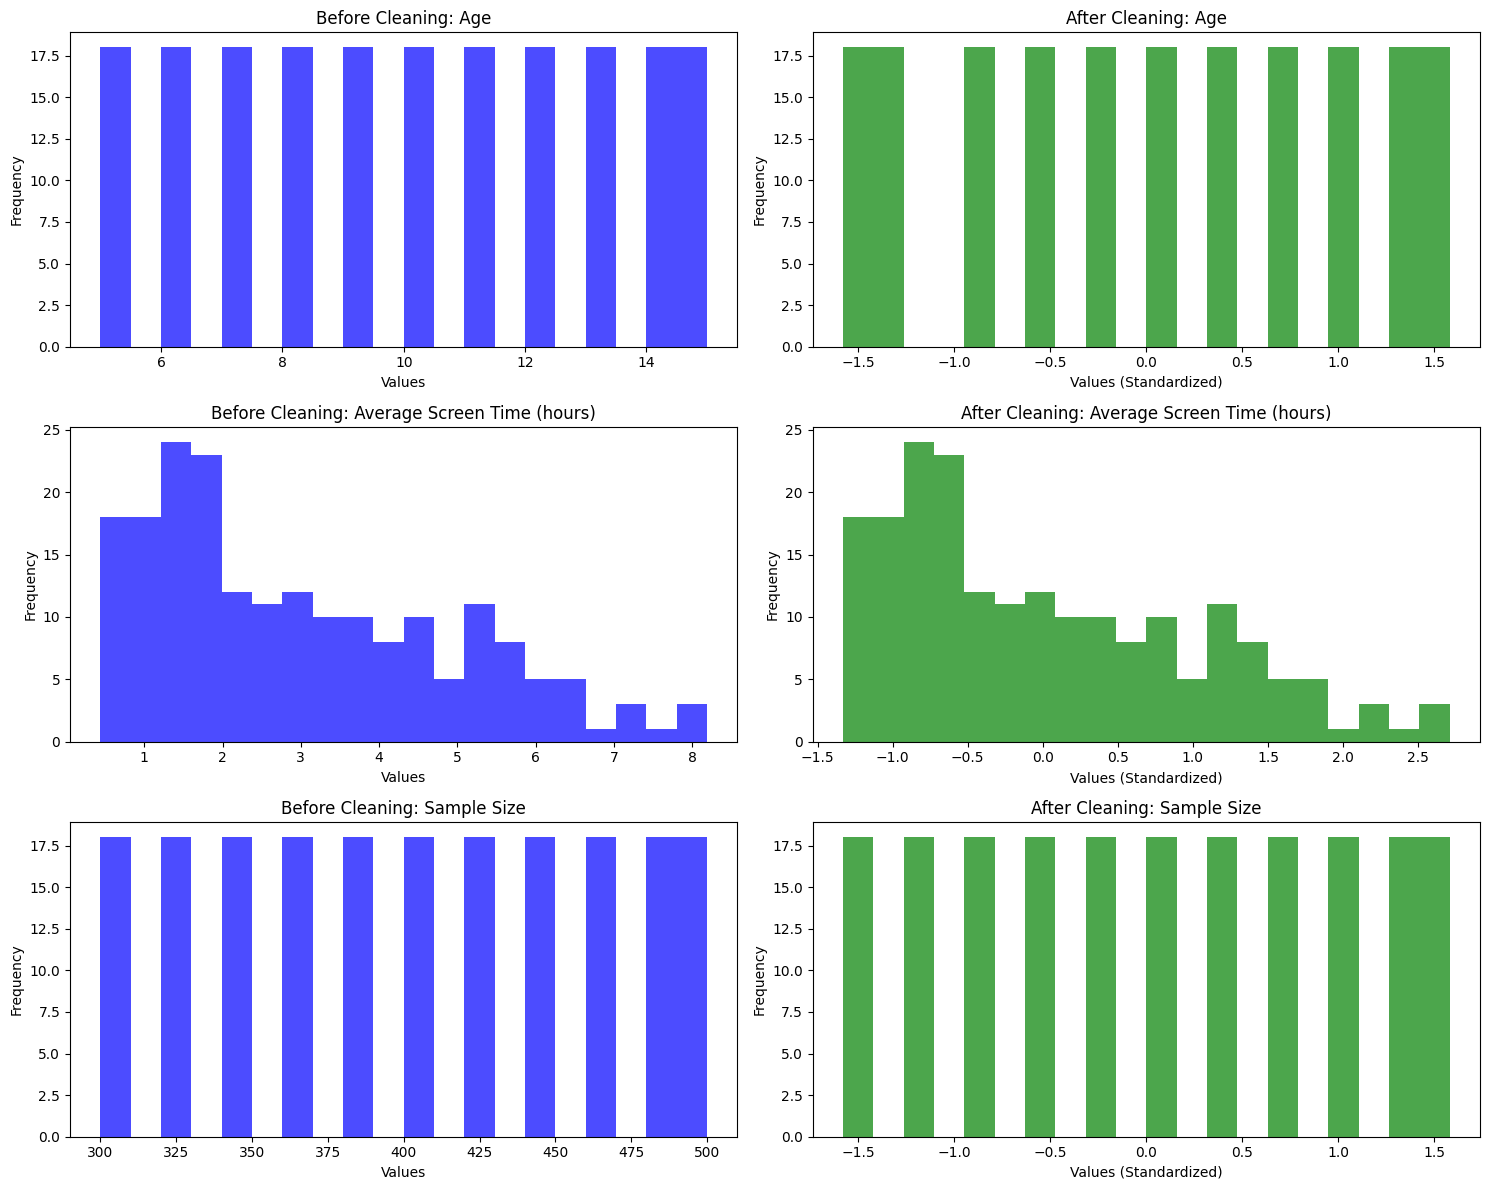

In [ ]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 4*len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Before cleaning
    axes[i, 0].hist(df_original[col], bins=20, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'Before Cleaning: {col}')
    axes[i, 0].set_xlabel('Values')
    axes[i, 0].set_ylabel('Frequency')

    # After cleaning / scaling
    axes[i, 1].hist(df[col], bins=20, alpha=0.7, color='green')
    axes[i, 1].set_title(f'After Cleaning: {col}')
    axes[i, 1].set_xlabel('Values (Standardized)')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Box plot

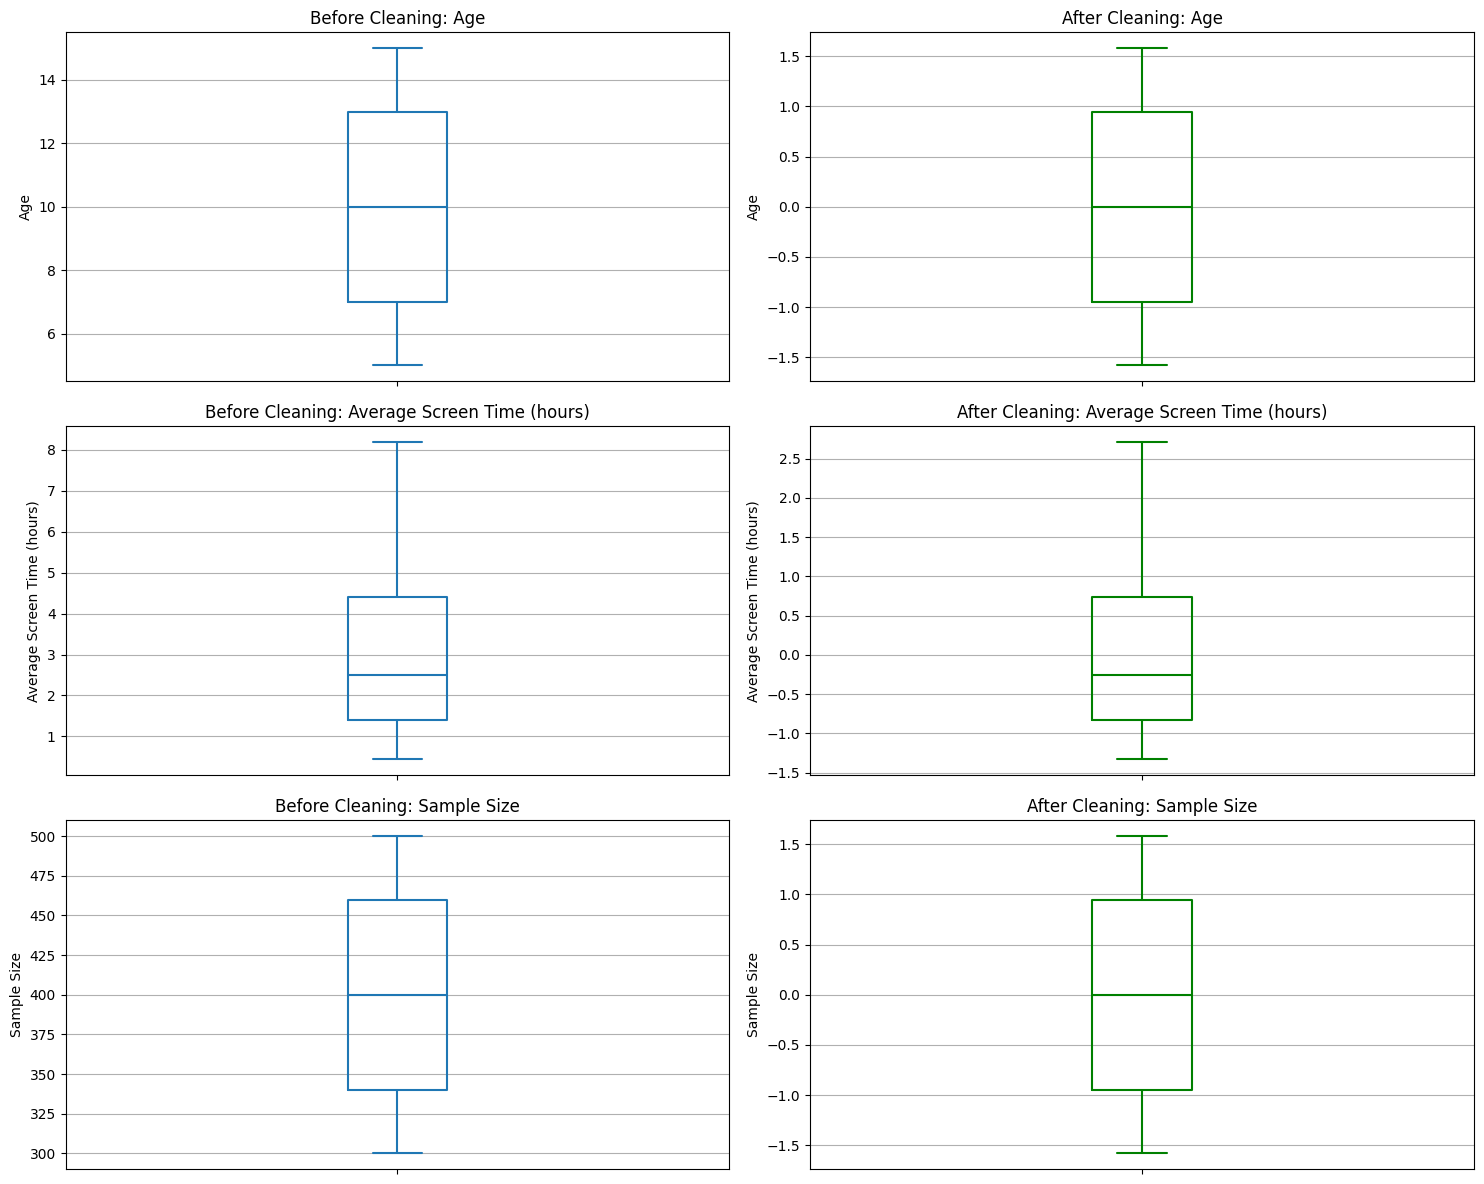

In [ ]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 4*len(numerical_columns)))

flier_style = dict(marker='o', markersize=8)
sns.set_theme(style="whitegrid")

for i, col in enumerate(numerical_columns):
    # Before cleaning
    sns.boxplot(y=df_original[col], ax=axes[i, 0], flierprops=flier_style, width=.15,fill=False )
    axes[i, 0].set_title(f"Before Cleaning: {col}")
    axes[i, 0].set_ylabel(col)
    axes[i, 0].grid(True, axis='y')

    # After cleaning
    sns.boxplot(y=df[col], ax=axes[i, 1],width=.15,fill=False,color='green')
    axes[i, 1].set_title(f"After Cleaning: {col}")
    axes[i, 1].set_ylabel(col)
    axes[i, 1].grid(True, axis='y')

plt.tight_layout()
plt.show()


# Outlier Detection

In [ ]:
df_before_clipping = df.copy()

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

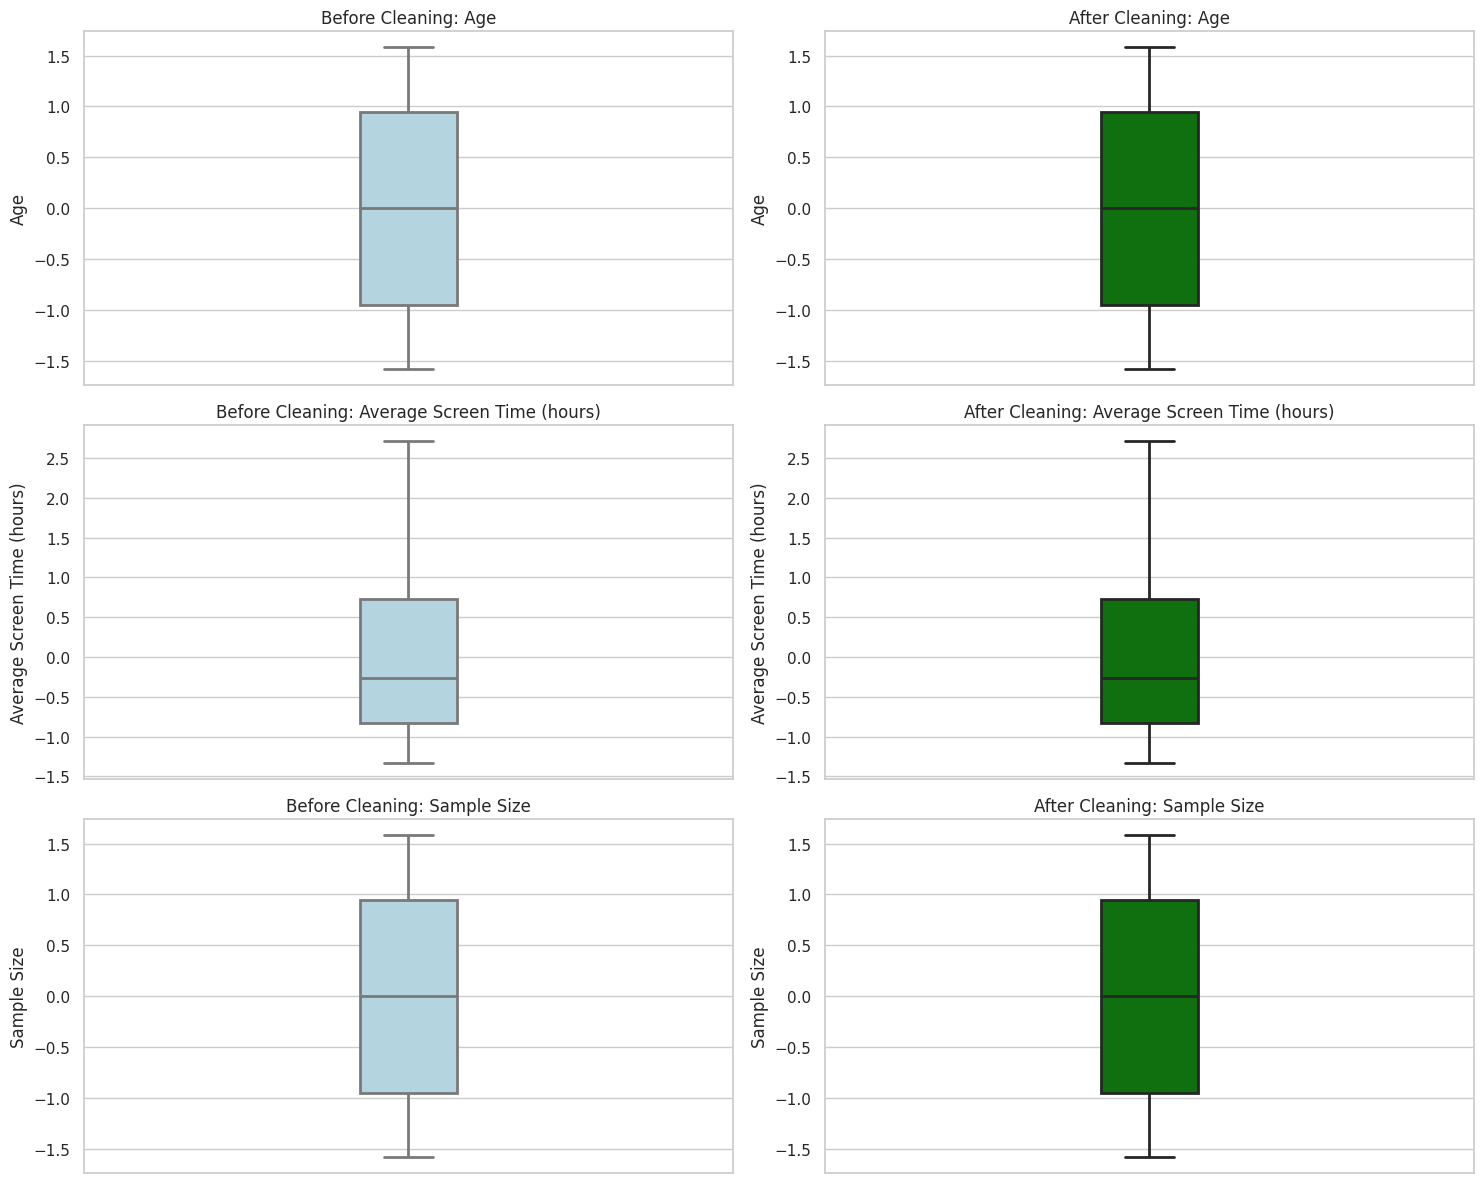

In [ ]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 4*len(numerical_columns)))

flier_style = dict(marker='o', markersize=8)
sns.set_theme(style="whitegrid")

for i, col in enumerate(numerical_columns):
    # Before cleaning
    sns.boxplot(y=df_before_clipping[col], ax=axes[i, 0], flierprops=flier_style, width=.15,linewidth=2,color='lightblue' )
    axes[i, 0].set_title(f"Before Cleaning: {col}")
    axes[i, 0].set_ylabel(col)
    axes[i, 0].grid(True, axis='y')

    # After cleaning
    sns.boxplot(y=df[col], ax=axes[i, 1],width=.15,linewidth=2,color='green')
    axes[i, 1].set_title(f"After Cleaning: {col}")
    axes[i, 1].set_ylabel(col)
    axes[i, 1].grid(True, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
display(df['Average Screen Time (hours)'].describe())

,Average Screen Time (hours)
count,1.980000e+02
mean,4.306320e-16
std,1.002535e+00
min,-1.331118e+00
25%,-8.292824e-01
50%,-2.622736e-01
75%,7.322728e-01
max,2.709634e+00


# Correlation Analysis

## Correlation between all numeric features

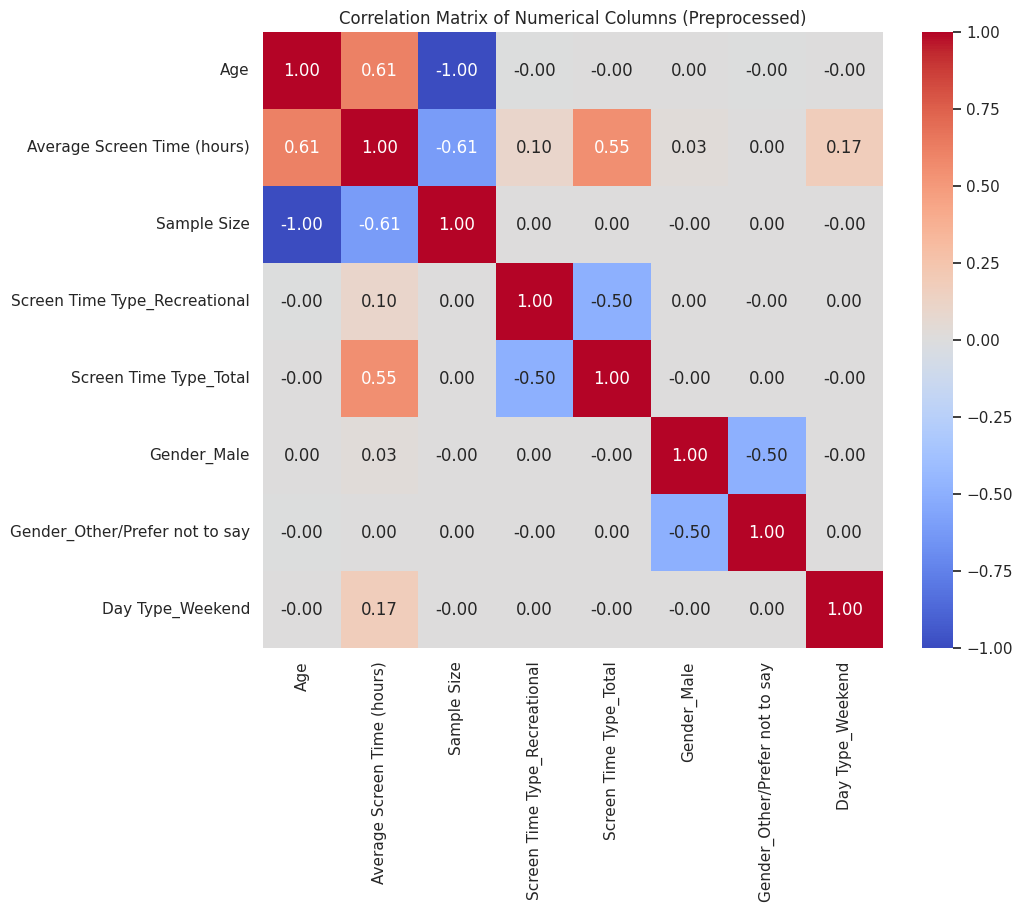

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns (Preprocessed)')
plt.show()

## Correlation between core numeric features only

,Age,Average Screen Time (hours),Sample Size
Age,1.00000,0.61311,-1.00000
Average Screen Time (hours),0.61311,1.00000,-0.61311
Sample Size,-1.00000,-0.61311,1.00000


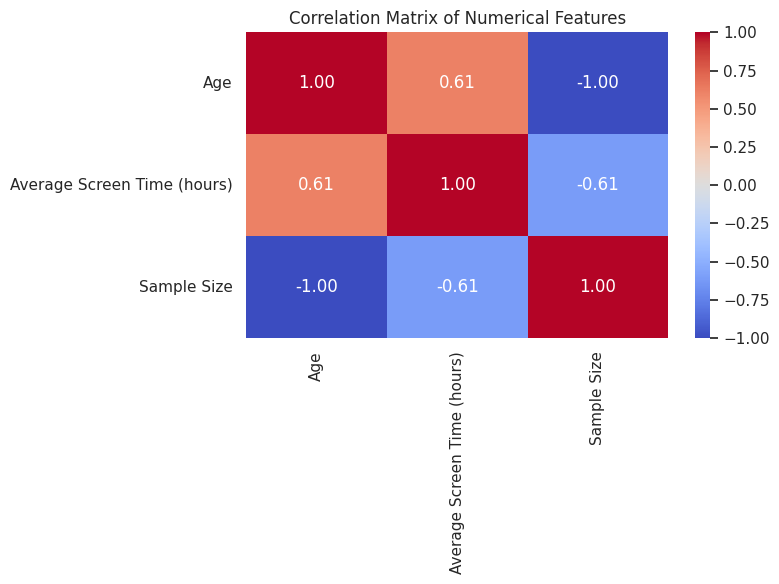

from matplotlib import pyplot as plt
correlation_matrix['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Average Screen Time (hours)'].plot(kind='hist', bins=20, title='Average Screen Time (hours)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Sample Size'].plot(kind='hist', bins=20, title='Sample Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Age', y='Average Screen Time (hours)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Average Screen Time (hours)', y='Sample Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sample Size']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sample Size', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sample Size')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sample Size']
  ys = series['Average Screen Time (hours)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sample Size', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sample Size')
_ = plt.ylabel('Average Screen Time (hours)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sample Size']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sample Size'}, axis=1)
              .sort_values('Sample Size', ascending=True))
  xs = counted['Sample Size']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sample Size', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sample Size')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
correlation_matrix['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Average Screen Time (hours)'].plot(kind='line', figsize=(8, 4), title='Average Screen Time (hours)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Sample Size'].plot(kind='line', figsize=(8, 4), title='Sample Size')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
correlation_matrix = df[numerical_columns].corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Correlation between Screen Time Type and other features

In [ ]:
df_recreational = df[df['Screen Time Type_Recreational'] == True].copy()
df_total = df[df['Screen Time Type_Total'] == True].copy()
df_educational = df[(df['Screen Time Type_Recreational'] == False) &
                    (df['Screen Time Type_Total'] == False)].copy()

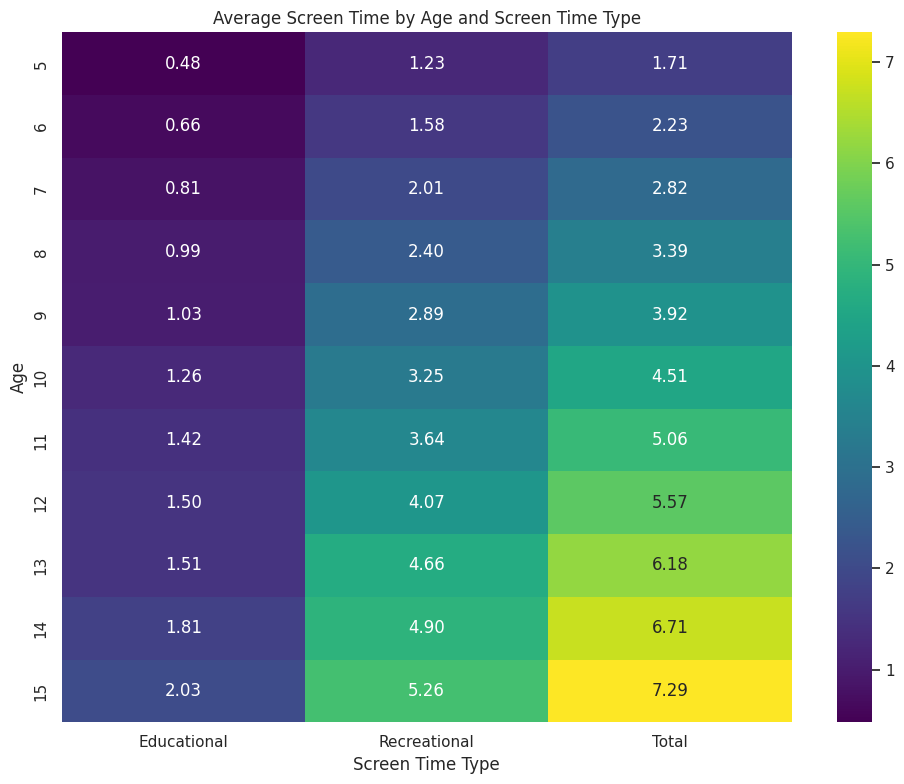

In [ ]:
# Pivot data to get average screen time for each type by age
df_screen = df_original.pivot_table(index='Age', columns='Screen Time Type', values='Average Screen Time (hours)')

# Plot the heatmap of the df_screen DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_screen, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Screen Time by Age and Screen Time Type')
plt.xlabel('Screen Time Type')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### Recreational Screen Time

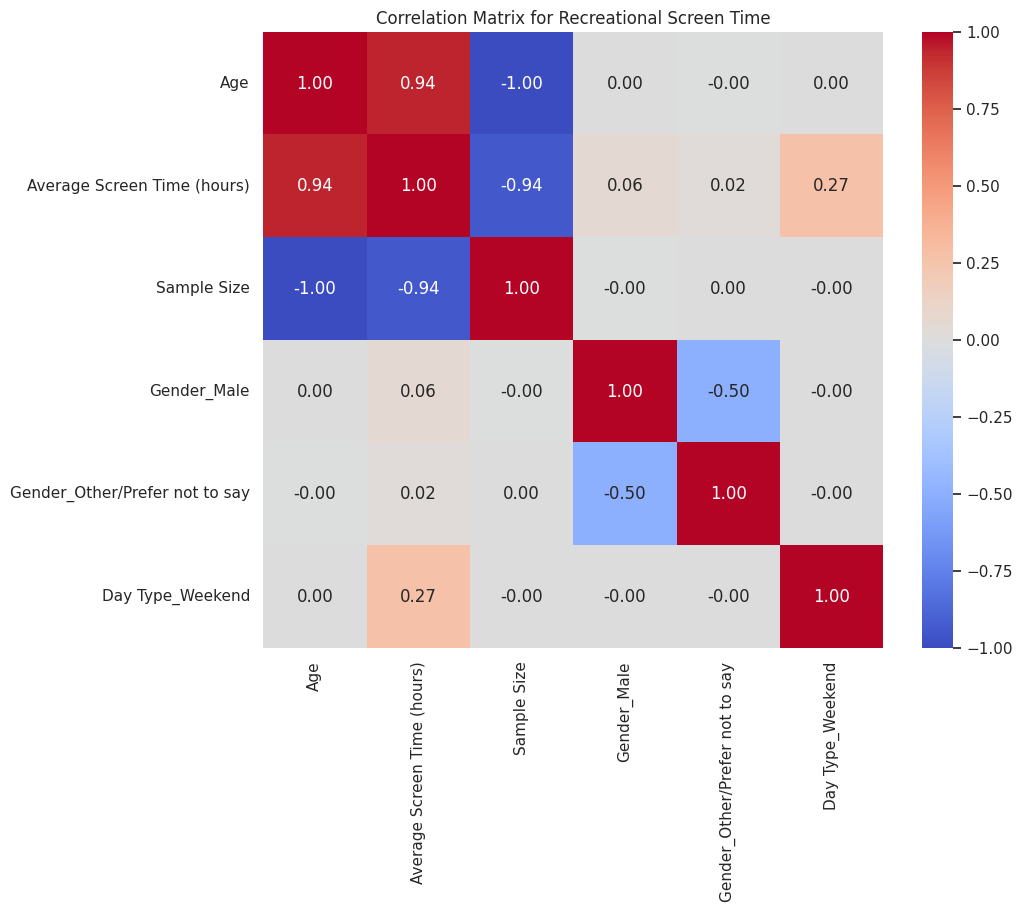

In [ ]:
selected_columns_recreational = ['Age', 'Average Screen Time (hours)', 'Sample Size', 'Gender_Male', 'Gender_Other/Prefer not to say', 'Day Type_Weekend']
correlation_matrix_recreational = df_recreational[selected_columns_recreational].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_recreational, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Recreational Screen Time')
plt.show()

### Total Screen Time

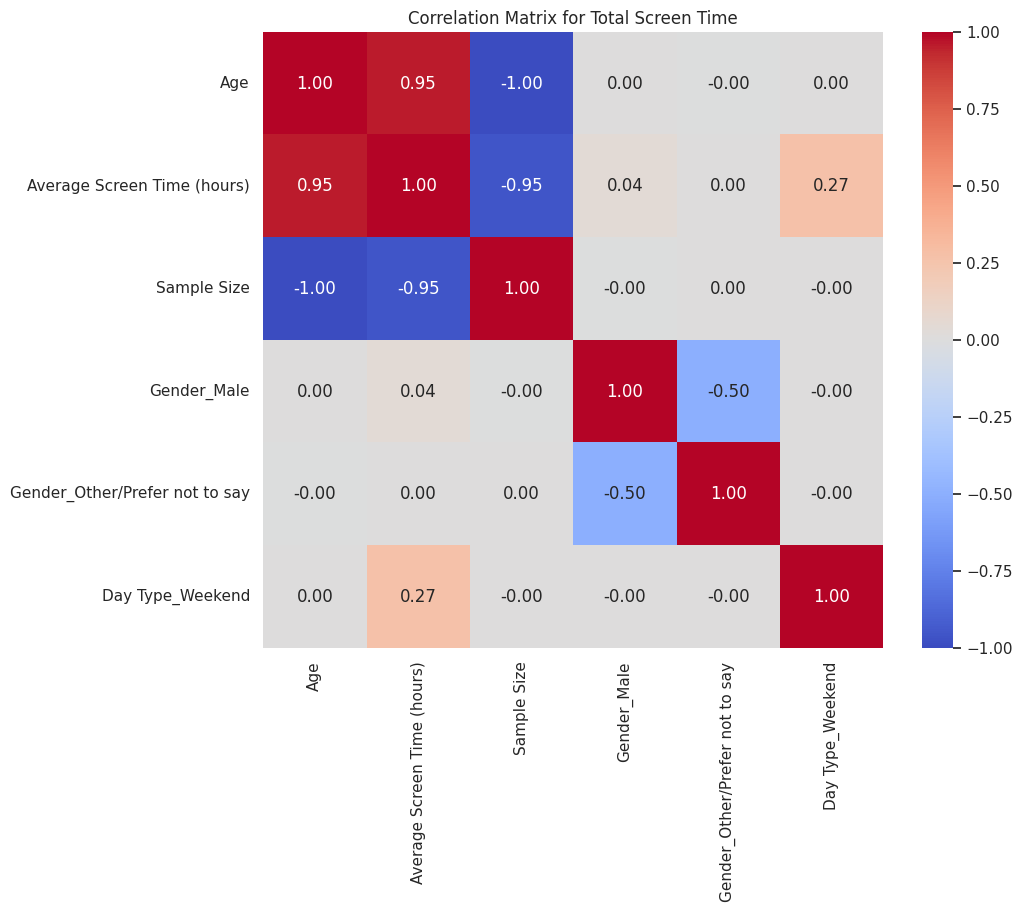

In [ ]:
selected_columns_total = ['Age', 'Average Screen Time (hours)', 'Sample Size', 'Gender_Male', 'Gender_Other/Prefer not to say', 'Day Type_Weekend']
correlation_matrix_total = df_total[selected_columns_total].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_total, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Total Screen Time')
plt.show()

### Educational Screen Time

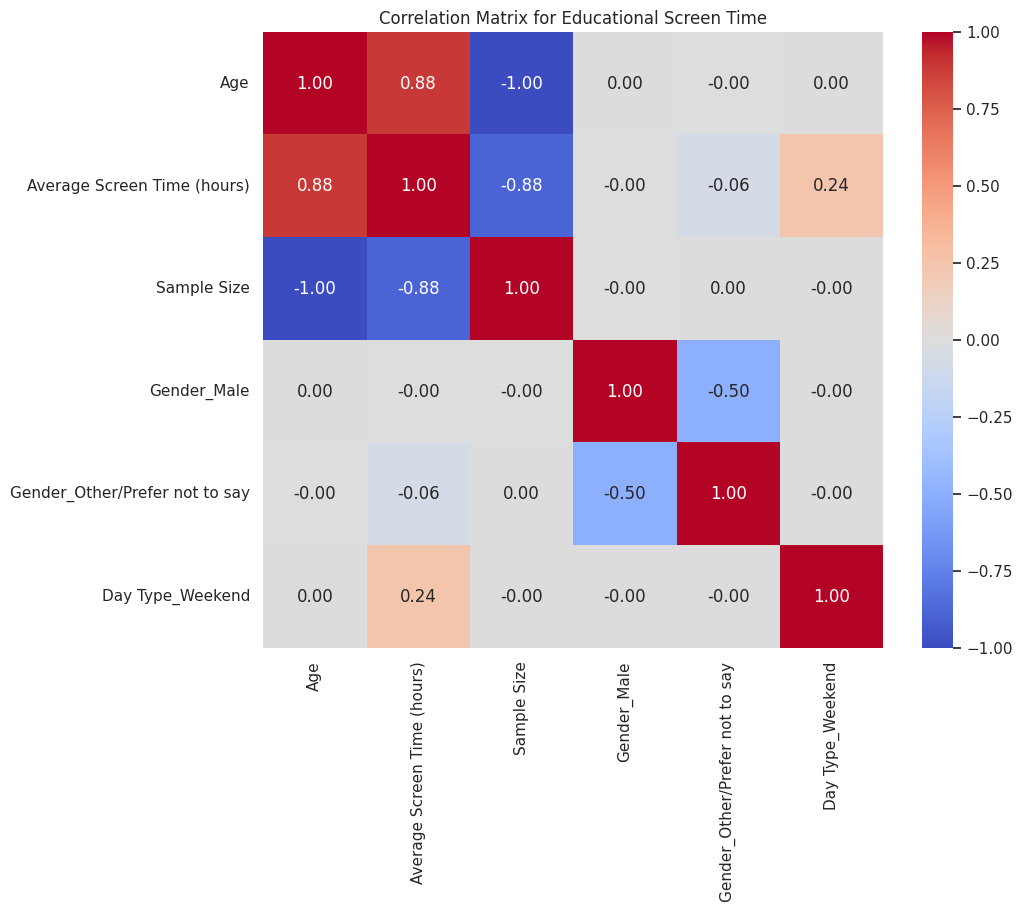

In [ ]:
selected_columns_educational = ['Age', 'Average Screen Time (hours)', 'Sample Size', 'Gender_Male', 'Gender_Other/Prefer not to say', 'Day Type_Weekend']
correlation_matrix_educational = df_educational[selected_columns_educational].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_educational, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Educational Screen Time')
plt.show()

In [ ]:
df_weekday = df[df['Day Type_Weekend'] == False].copy()
df_weekend = df[df['Day Type_Weekend'] == True].copy()

### Weekday Screen Time

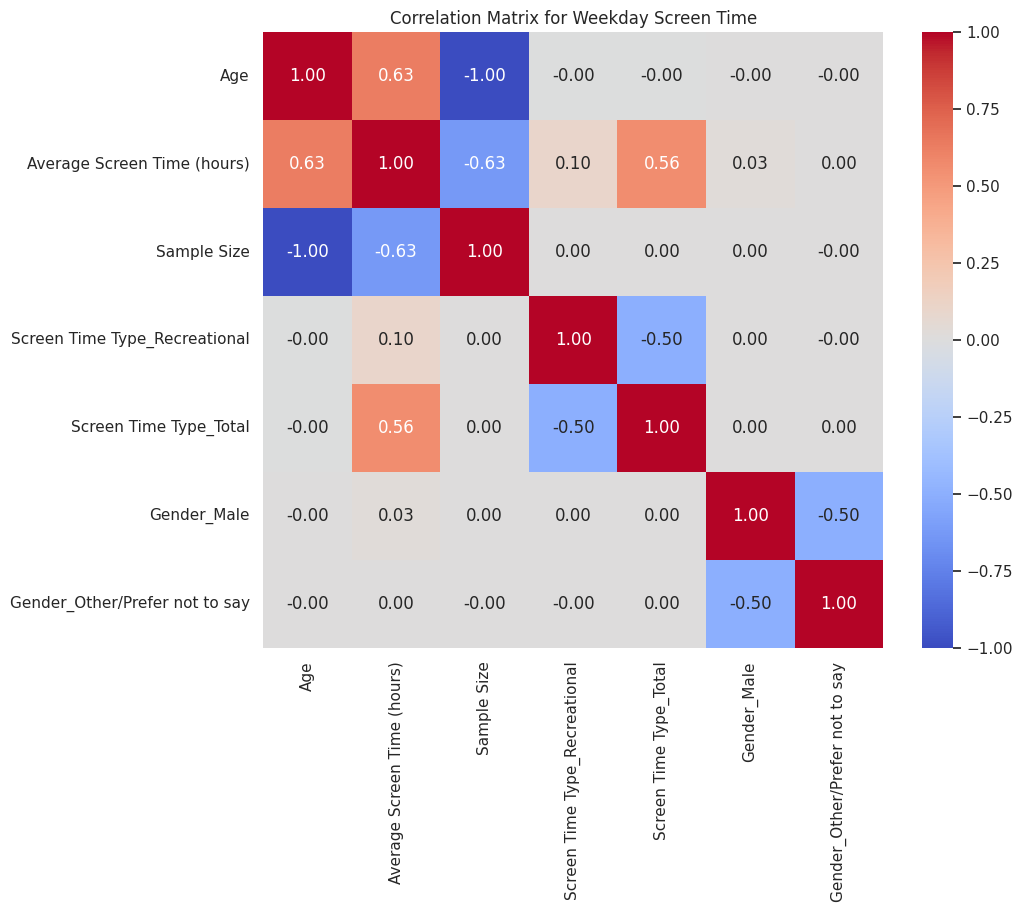

In [ ]:

selected_columns_weekday = ['Age', 'Average Screen Time (hours)', 'Sample Size', 'Screen Time Type_Recreational', 'Screen Time Type_Total', 'Gender_Male', 'Gender_Other/Prefer not to say']
correlation_matrix_weekday = df_weekday[selected_columns_weekday].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_weekday, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Weekday Screen Time')
plt.show()

### Weekend Screen Time

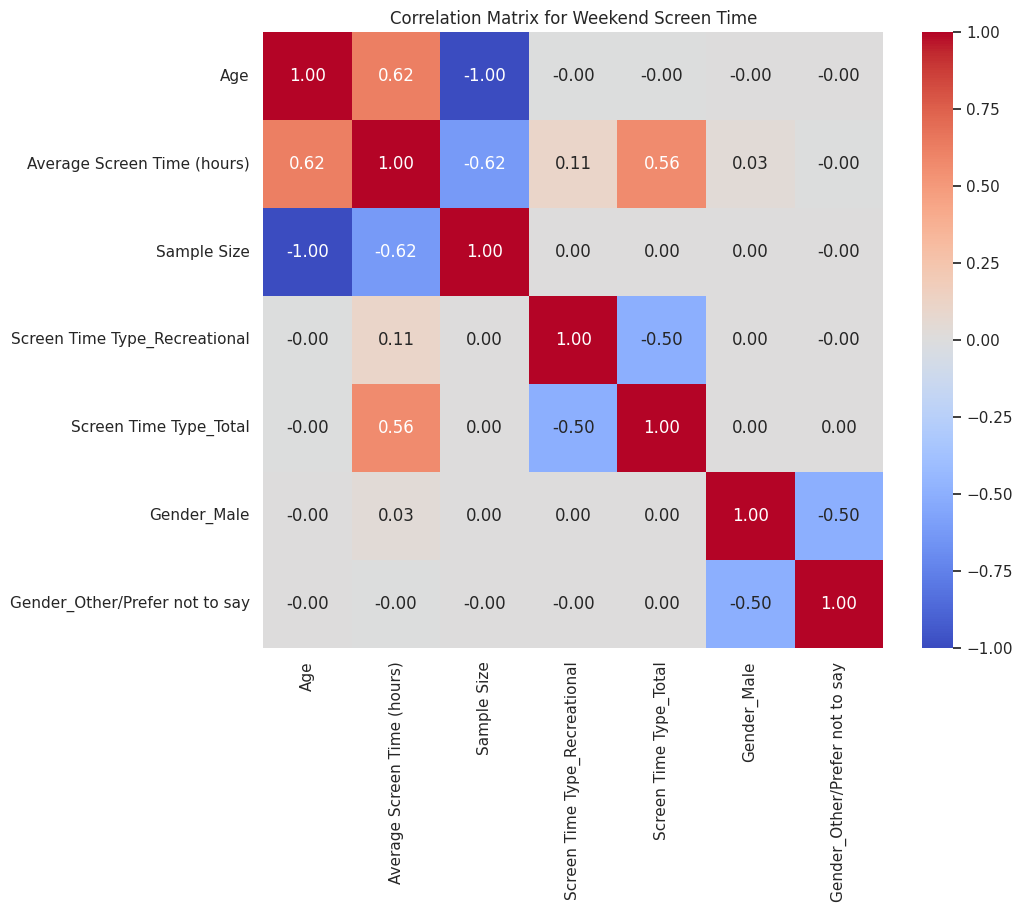

In [ ]:
# Select relevant columns for weekend screen time, excluding the day type column
selected_columns_weekend = ['Age', 'Average Screen Time (hours)', 'Sample Size', 'Screen Time Type_Recreational', 'Screen Time Type_Total', 'Gender_Male', 'Gender_Other/Prefer not to say']
correlation_matrix_weekend = df_weekend[selected_columns_weekend].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_weekend, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Weekend Screen Time')
plt.show()

# Regression Modeling

## Model Importing

In [ ]:
from sklearn.linear_model import LinearRegression

X = df.drop('Average Screen Time (hours)', axis=1) # Selecting features
y = df['Average Screen Time (hours)'] # Selecting labels

model = LinearRegression()

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) #Train vs temp split into 70/30
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Test vs Validation split into 15/15
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (138, 7) (138,)
Validation set shape: (30, 7) (30,)
Test set shape: (30, 7) (30,)


## Model Training and Validating

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

model.fit(X_train, y_train) # Train the model using training data
y_val_pred = model.predict(X_val) # Predict on validating data

mse = mean_squared_error(y_val, y_val_pred) # Measure how far prediction are from actual value
r2 = r2_score(y_val, y_val_pred) # Measures how well model explains the variance

print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R-squared: {r2}")

Validation Mean Squared Error: 0.1501261543193496
Validation R-squared: 0.8735137306418232


## Model Evalutaion on test set

In [ ]:
y_test_pred = model.predict(X_test) # Predict on Test data

mse = mean_squared_error(y_test, y_test_pred) # Measures how far prediction are from actual value
r2 = r2_score(y_test, y_test_pred) # Measures how well model explains the variance

print(f"Test Mean Squared Error: {mse}")
print(f"Test R-squared: {r2}")

Test Mean Squared Error: 0.14120344614720676
Test R-squared: 0.8792739177964896


## Interpretation of regressoin results

In [ ]:
coefficients = model.coef_
feature_names = X_train.columns

coef_analysis = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
display(coef_analysis)

,Feature,Coefficient
0,Age,0.313651
1,Sample Size,-0.313651
2,Screen Time Type_Recreational,1.123633
3,Screen Time Type_Total,1.718033
4,Gender_Male,0.131741
5,Gender_Other/Prefer not to say,0.064723
6,Day Type_Weekend,0.383585


In [ ]:
print("Interpretation of Coefficients:")
for index, row in coef_analysis.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    print(f"- {feature}: Coefficient = {coefficient:.4f}")
    if coefficient > 0:
        print(f"  Interpretation: A one-unit increase in {feature} is associated with an increase of {abs(coefficient):.4f} hours in Average Screen Time, holding other features constant.")
    elif coefficient < 0:
        print(f"  Interpretation: A one-unit increase in {feature} is associated with a decrease of {abs(coefficient):.4f} hours in Average Screen Time, holding other features constant.")
    else:
        print(f"  Interpretation: {feature} has no linear association with Average Screen Time, holding other features constant.")

Interpretation of Coefficients:
- Age: Coefficient = 0.3137
  Interpretation: A one-unit increase in Age is associated with an increase of 0.3137 hours in Average Screen Time, holding other features constant.
- Sample Size: Coefficient = -0.3137
  Interpretation: A one-unit increase in Sample Size is associated with a decrease of 0.3137 hours in Average Screen Time, holding other features constant.
- Screen Time Type_Recreational: Coefficient = 1.1236
  Interpretation: A one-unit increase in Screen Time Type_Recreational is associated with an increase of 1.1236 hours in Average Screen Time, holding other features constant.
- Screen Time Type_Total: Coefficient = 1.7180
  Interpretation: A one-unit increase in Screen Time Type_Total is associated with an increase of 1.7180 hours in Average Screen Time, holding other features constant.
- Gender_Male: Coefficient = 0.1317
  Interpretation: A one-unit increase in Gender_Male is associated with an increase of 0.1317 hours in Average Screen 

# Data Visualizatoin

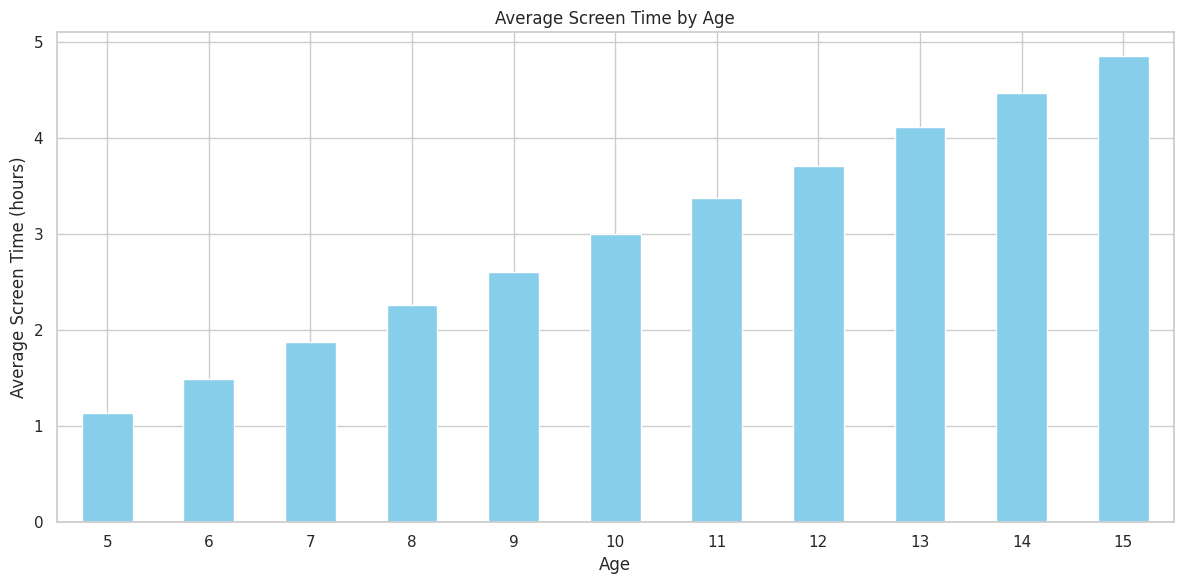

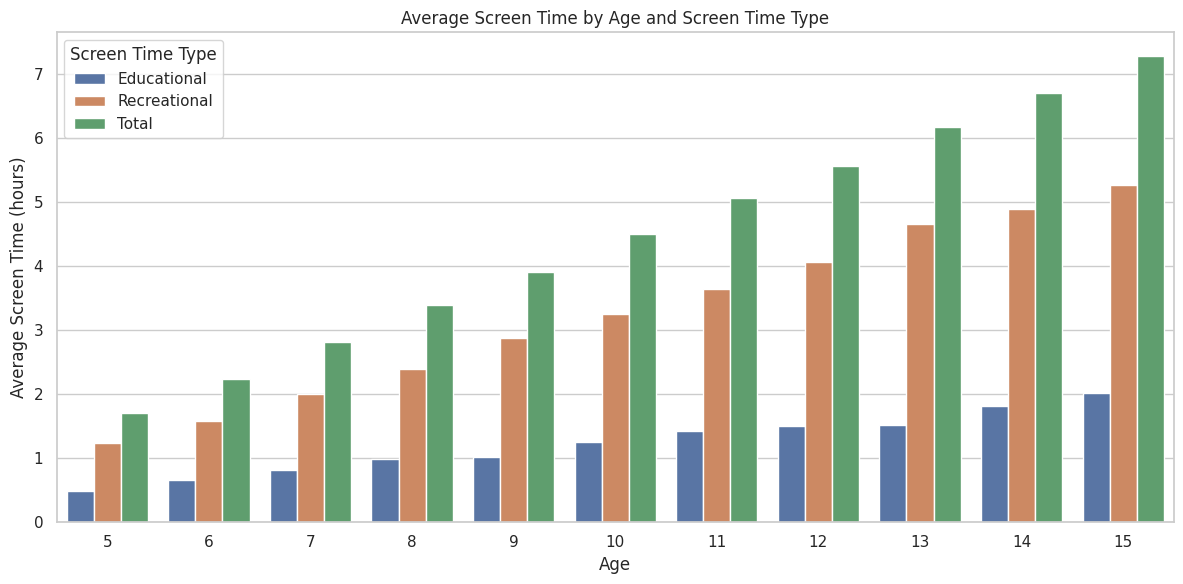

In [ ]:
# i. Bar chart comparing average screen time by age and Screen Time Type
plt.figure(figsize=(12, 6))
df_original.groupby('Age')['Average Screen Time (hours)'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Screen Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_original, x='Age', y='Average Screen Time (hours)', hue='Screen Time Type', errorbar=None)
plt.title('Average Screen Time by Age and Screen Time Type')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

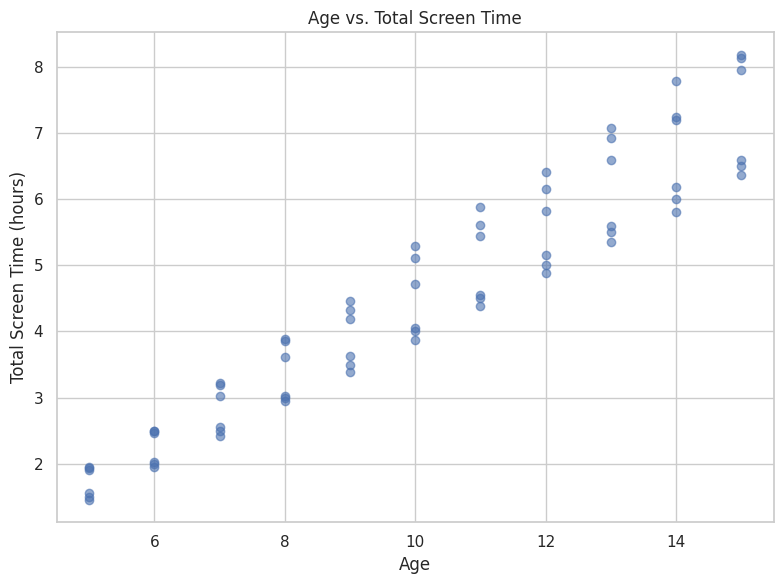

In [ ]:
# ii. Scatter plot to show the relationship between age and total screen time
df_total_screen_time = df_original[df_original['Screen Time Type'] == 'Total']

plt.figure(figsize=(8, 6))
plt.scatter(df_total_screen_time['Age'], df_total_screen_time['Average Screen Time (hours)'], alpha=0.6)
plt.title('Age vs. Total Screen Time')
plt.xlabel('Age')
plt.ylabel('Total Screen Time (hours)')
plt.grid(True)
plt.tight_layout()
plt.show()

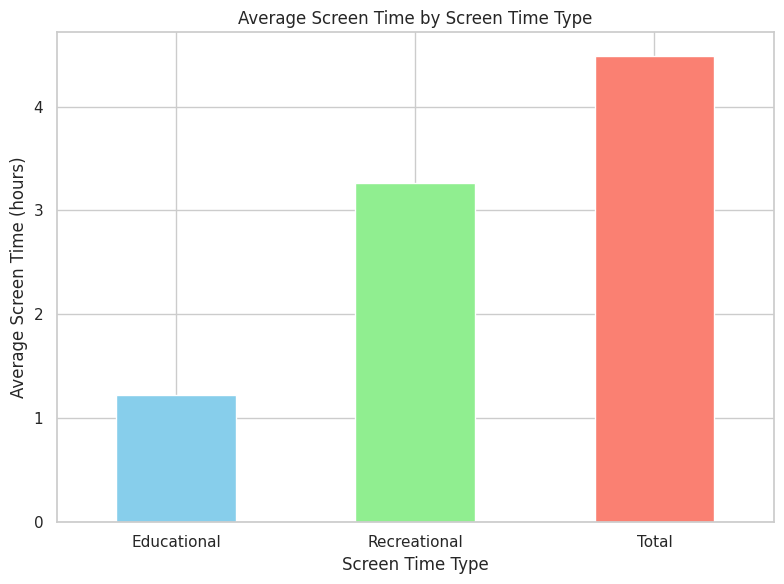

In [ ]:
# 1. Average screen time by Screen Time Type
plt.figure(figsize=(8, 6))
df_original.groupby('Screen Time Type')['Average Screen Time (hours)'].mean().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Screen Time by Screen Time Type')
plt.xlabel('Screen Time Type')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

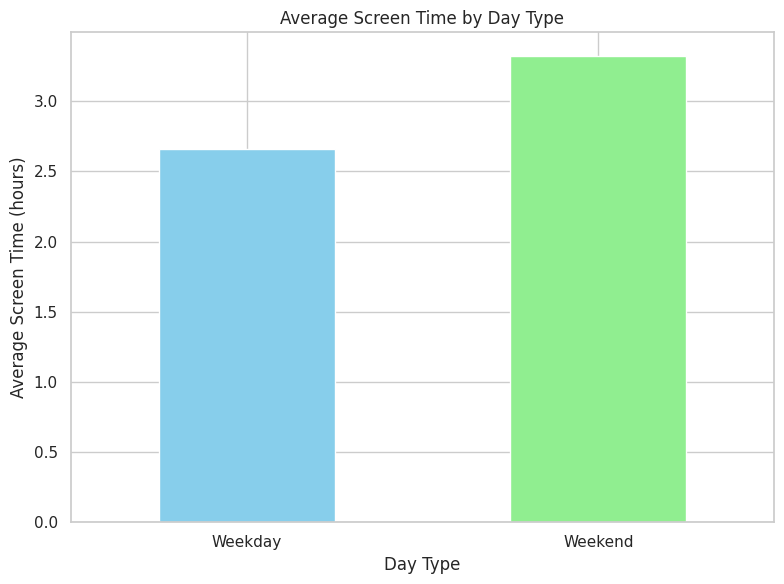

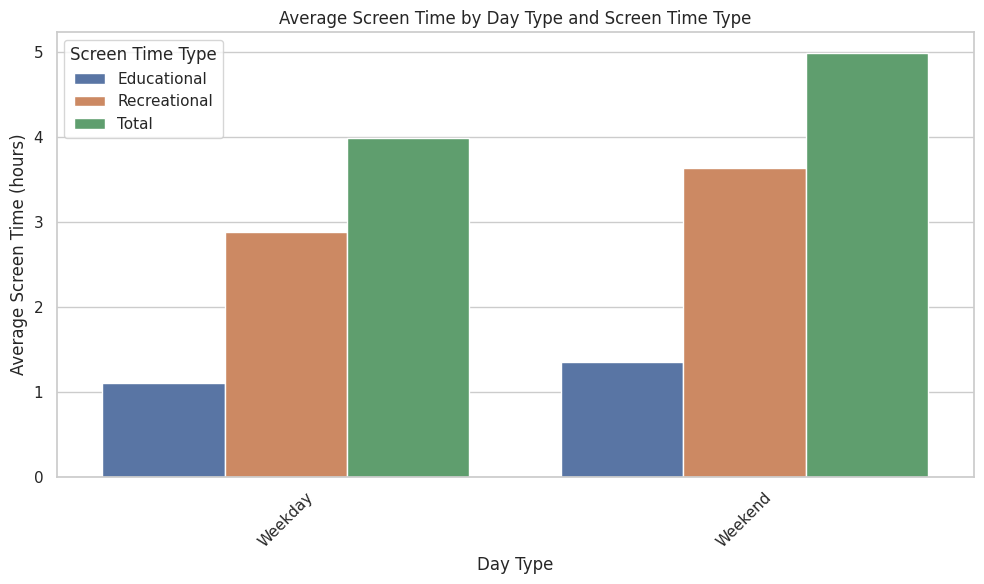

In [ ]:
# 3. Average screen time by Day Type
plt.figure(figsize=(8, 6))
df_original.groupby('Day Type')['Average Screen Time (hours)'].mean().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Screen Time by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Group by Gender and Type and calculate the mean of Average Screen Time (hours)
screen_time_by_gender_type = df_original.groupby(['Day Type', 'Screen Time Type'])['Average Screen Time (hours)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=screen_time_by_gender_type, x='Day Type', y='Average Screen Time (hours)', hue='Screen Time Type')
plt.title('Average Screen Time by Day Type and Screen Time Type')
plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()